<h1> Overview </h1>

For this project we are working on Regression Model Development for the company Apprentice Chef, Inc., which provides a variety of high-quality meals that are prepared every day and delivered directly to the client’s doorstep. Each meal set can be cooked in 30 minutes or less and it comes with disposable cookware, which makes cleaning up quick and simple. Moreover, ordering meals is effortless thanks to the company’s user-friendly online platform and mobile application.

For this project, we are creating regression models that predict a continuous response variable (also known as the Y-variable), and we prepare the data for these models by selecting relevant variables, and in the end developing the model.


<h1> Importing libraries and cleaning data </h1>

The purpose of the whole section is importing Python libraries that we need to use for data manipulation, graphical output, mathematical operations, and regression modeling.- Pandas, Matplotlib, Seaborn, Numpy, and StatsModels.formula.api.

The code below imports the libraries and and prints Panda options to display rows and columns.

In [1]:
# importing libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Apprentice_Chef_Dataset_2023.xlsx'


# reading the file into Python
chef = pd.read_excel(file)

The purpose of the code below is to display information about each variable in the 'chef' dataset, such as the variable's data type, the number of non-null values.

This code is needed to understand the basic structure of the dataset and check if there are any missing values so they can be cleared for future purposes (for analyzing and modeling).

In [2]:
# INFOrmation about each variable
chef.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1900 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

The code above generated the output that shows us the data types of each column so now we can separate them into continuous, interval and categorical types. 

<h4> Continuous </h4>
REVENUE
AVG_TIME_PER_SITE_VISIT
AVG_PREP_VID_TIME
AVG_MEAN_RATING

<h4> Interval </h4>
PC_LOGINS
TOTAL_MEALS_ORDERED          
UNIQUE_MEALS_PURCH          
CONTACTS_W_CUSTOMER_SERVICE 
PRODUCT_CATEGORIES_VIEWED
CANCELLATIONS_AFTER_NOON     
MOBILE_LOGINS           
WEEKLY_PLAN                  
LATE_DELIVERIES   
LARGEST_ORDER_SIZE
TOTAL_PHOTOS_VIEWED

<h4> Categorical </h4>
NAME                         
EMAIL                        
FIRST_NAME                   
FAMILY_NAME 

The code below provides the data on how many missing values we have in each column. It turnes out that only family name has 46 missing values. 

In [3]:
# taking the chef dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per column
chef.isnull().sum(axis = 0)

REVENUE                         0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    46
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
CANCELLATIONS_AFTER_NOON        0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
LATE_DELIVERIES                 0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
AVG_MEAN_RATING                 0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

Getting rid of all missing values in the column "Family name". However, it does not have an impact on the analysis. 

In [4]:
#instantiating an imputation value
fill = 0

# imputing 'Family name'
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna(fill)

All set! Missing values are removed and the code confirms it giving back "True" result. 

In [5]:
# making sure all missing values have been taken care of
chef.isnull().any().any()

False

We build the OLS regression below because OLS regression is used to estimate the relationship between our independent variables and a dependent variable, which in this case REVENUE and AVG_TIME_PER_SITE_VISIT. 

The goal is to find the best linear relationship between them. 

In [6]:
# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """REVENUE ~ AVG_TIME_PER_SITE_VISIT
                                        
                                                                
                                                                """,
                      data = chef)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     1375.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          5.07e-228
Time:                        20:38:20   Log-Likelihood:                -15935.
No. Observations:                1946   AIC:                         3.187e+04
Df Residuals:                    1944   BIC:                         3.189e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                -

Creation of several histoplots to check how skewed the revenue data is. 

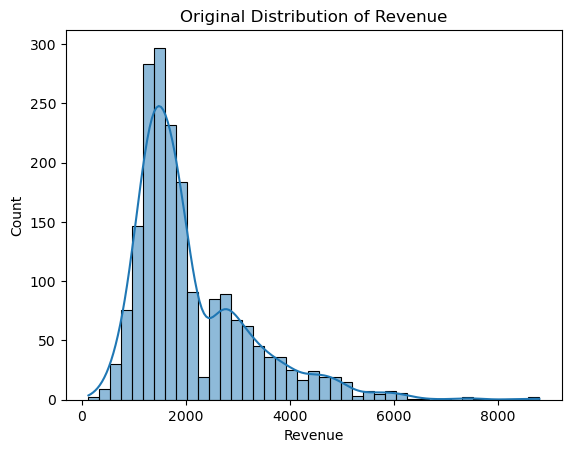

In [7]:
# developing a histogram using HISTPLOT
sns.histplot(data   = chef,
             x      = 'REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [8]:
# log transforming Revenue and saving it to the dataset
chef['log_REVENUE'] = np.log(chef['REVENUE'])

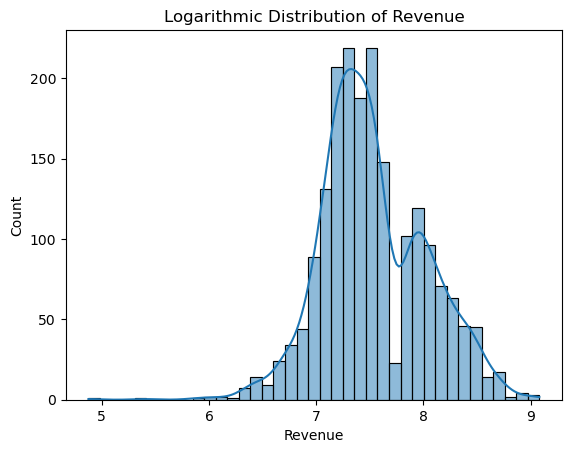

In [9]:
# developing a histogram using HISTPLOT
sns.histplot(data   = chef,
             x      = 'log_REVENUE',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Revenue")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [10]:
# log transforming AVG_TIME_PER_SITE_VISIT and saving it to the dataset
chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log(chef['AVG_TIME_PER_SITE_VISIT'])

In [11]:
# building a base model with a log transformed response variable

# INSTANTIATING a model type
lm_price_qual = smf.ols(formula = """log_REVENUE ~ log_AVG_TIME_PER_SITE_VISIT""",
                        data = chef)


# telling Python to FIT the data to the blueprint
results = lm_price_qual.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     1582.
Date:                Sun, 19 Feb 2023   Prob (F-statistic):          1.32e-253
Time:                        20:38:21   Log-Likelihood:                -784.13
No. Observations:                1946   AIC:                             1572.
Df Residuals:                    1944   BIC:                             1583.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

The purpose of the code below is to see how many zeroes (not missing values) every variable has. In the end information from this code hasn't been used.

In [12]:
# counting the number of zeroes
pc_zeroes   = len(chef['PC_LOGINS'][chef['PC_LOGINS'] == 0])
meals_total_zeroes     = len(chef['TOTAL_MEALS_ORDERED'][chef['TOTAL_MEALS_ORDERED'] == 0])
meals_unique_zeroes = len(chef['UNIQUE_MEALS_PURCH'][chef['UNIQUE_MEALS_PURCH'] == 0])
cc_zeroes   = len(chef['CONTACTS_W_CUSTOMER_SERVICE'][chef['CONTACTS_W_CUSTOMER_SERVICE'] == 0])
cat_zeroes    = len(chef['PRODUCT_CATEGORIES_VIEWED'][chef['PRODUCT_CATEGORIES_VIEWED'] == 0])
canc_zeroes  = len(chef['CANCELLATIONS_AFTER_NOON'][chef['CANCELLATIONS_AFTER_NOON'] == 0])
mobile_zeroes   = len(chef['MOBILE_LOGINS'][chef['MOBILE_LOGINS'] == 0])
plan_zeroes     = len(chef['WEEKLY_PLAN'][chef['WEEKLY_PLAN'] == 0])
late_zeroes = len(chef['LATE_DELIVERIES '][chef['LATE_DELIVERIES '] == 0])
lar_zeroes   = len(chef['LARGEST_ORDER_SIZE'][chef['LARGEST_ORDER_SIZE'] == 0])
photo_zeroes  = len(chef['TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] == 0])

# printing a table of the results
print(f"""
                                    No\t\tYes
                              ---------------------
PC                           | {pc_zeroes}\t\t{len(chef) - pc_zeroes}
Total meals                  | {meals_total_zeroes}\t\t{len(chef) - meals_total_zeroes}
Unique meals                 | {meals_unique_zeroes}\t\t{len(chef) - meals_unique_zeroes}
Customer Service             | {cc_zeroes}\t\t{len(chef) - cc_zeroes}
Product category             | {cat_zeroes}\t\t{len(chef) - cat_zeroes}
Cancelation                  | {canc_zeroes}\t\t{len(chef) - canc_zeroes}
Mobile                       | {mobile_zeroes}\t\t{len(chef) - mobile_zeroes}
Plan                         | {plan_zeroes}\t\t{len(chef) - plan_zeroes}
Late Deliveries              | {late_zeroes}\t\t{len(chef) - late_zeroes}
Largest order size           | {lar_zeroes}\t\t{len(chef) - lar_zeroes}
Photo                        | {photo_zeroes}\t\t{len(chef) - photo_zeroes}
""")



                                    No		Yes
                              ---------------------
PC                           | 0		1946
Total meals                  | 0		1946
Unique meals                 | 0		1946
Customer Service             | 0		1946
Product category             | 0		1946
Cancelation                  | 572		1374
Mobile                       | 16		1930
Plan                         | 468		1478
Late Deliveries              | 1433		513
Largest order size           | 0		1946
Photo                        | 0		1946



Visualization of correlation between revenue and other variables in the dataset using scatterplots. 

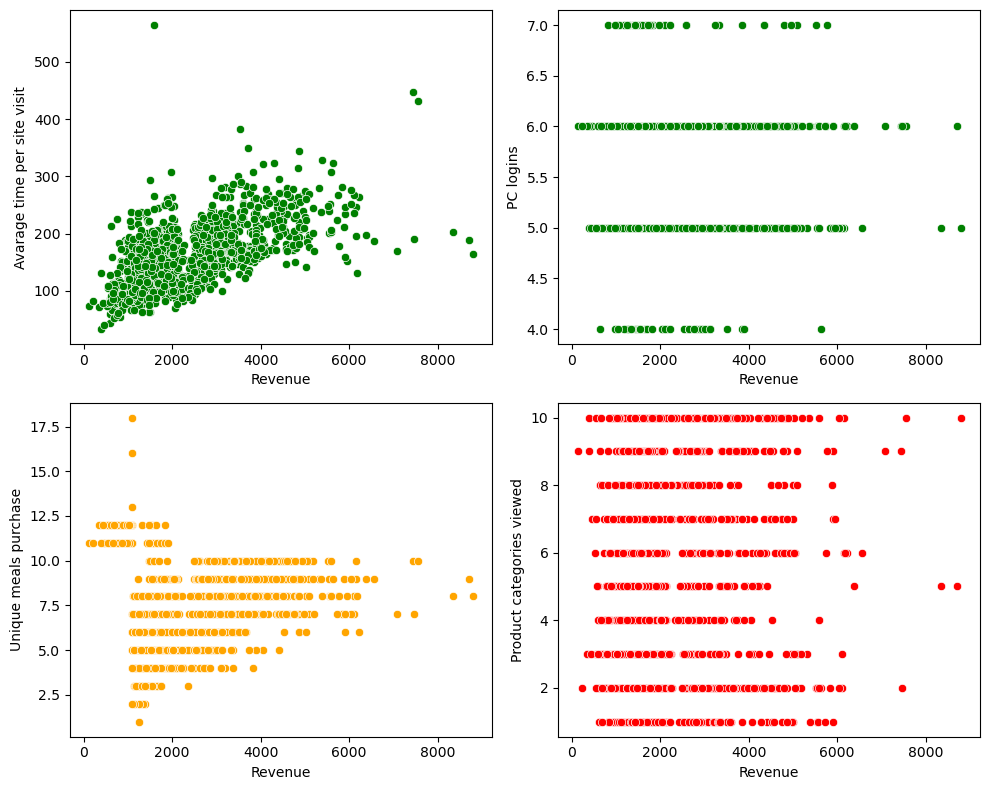

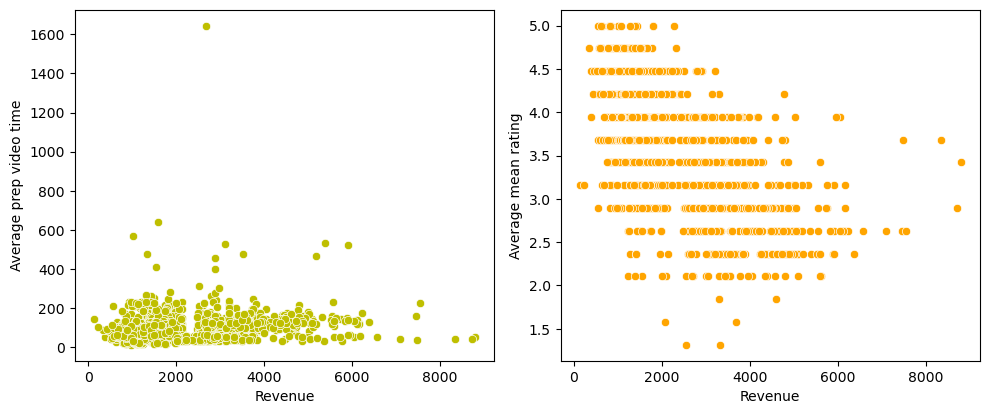

In [13]:
########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['REVENUE'],
                y = chef['AVG_TIME_PER_SITE_VISIT'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Revenue')
plt.ylabel(ylabel = 'Avarage time per site visit')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['REVENUE'],
                y = chef['PC_LOGINS'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Revenue')
plt.ylabel(ylabel = 'PC logins')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['REVENUE'],
                y = chef['UNIQUE_MEALS_PURCH'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Revenue')
plt.ylabel(ylabel = 'Unique meals purchase')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['REVENUE'],
                y = chef['PRODUCT_CATEGORIES_VIEWED'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Revenue')
plt.ylabel(ylabel = 'Product categories viewed')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = chef['REVENUE'],
                y = chef['AVG_PREP_VID_TIME'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Revenue')
plt.ylabel(ylabel = 'Average prep video time')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = chef['REVENUE'],
                y = chef['AVG_MEAN_RATING'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Revenue')
plt.ylabel(ylabel = 'Average mean rating')


########################



# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

In [14]:
print(chef.columns)

Index(['REVENUE', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES ', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED', 'log_REVENUE', 'log_AVG_TIME_PER_SITE_VISIT'], dtype='object')


<h1> Regression Model Development </h1>

<h2> Overview </h2>

In this section we will be building different regression models for modeling the relationship between a response variable and predictor variables. 

Regression analysis is used to make predictions about the value of the response variable based on the values of the predictor variables. This can be useful for forecasting sales, demand, or other outcomes for the Apprentice Chef, Inc. in the future. 



The code below is responsible for defining two lists of x-variables, where x-variables are predictor variables that are used to predict a response variable in the future regression models that will appear in this project.


In [15]:
# x-variables for normal y
x_var       =  ['TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 
                'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 
                'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES ', 
                'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING', 
                'TOTAL_PHOTOS_VIEWED']


# x-variables for log y
x_var_log_y = ['PC_LOGINS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
               'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'CANCELLATIONS_AFTER_NOON',
               'MOBILE_LOGINS', 'WEEKLY_PLAN', 'LATE_DELIVERIES ',
               'LARGEST_ORDER_SIZE', 'TOTAL_PHOTOS_VIEWED']



We need the code below because it prepares the data for machine learning and analyzing by using scikit-learn library, specifically for train-test splitting, which is essential for these purposes.


In [16]:
# preparing for scikit-learn
from sklearn.model_selection import train_test_split

# Preparing a DataFrame based the the analysis above
#x_data = chef.loc[ : , x_var_log_y]
x_data = chef.loc[ : , x_var]

# preparing response variable
#y_data      = chef.loc[ : , 'REVENUE']
y_data  = chef.loc[ : , 'log_REVENUE']


#################################
## setting up train-test split ##
#################################
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables 
            y_data, # y-variable  
            test_size    = 0.25,
            random_state = 219)

The code below is used for creation of a simple linear regression model using scikit-learn library that we implemented just above. The purpose of this model is to predict the continuous response variable (revenue or log-revenue) based on the predictor variables (features or independent variables) that have been selected in the previous code block.

Linear regression is a necessary technique in statistics and machine learning for modeling the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the independent and dependent variables and tries to find the best-fit straight line through the data points that minimize the sum of the squared errors.


In [17]:
from sklearn.linear_model import LinearRegression

# Setting a model name
model_name = "Linear Regression"


# INSTANTIATING a model object
model = LinearRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results

print(f"""
Model: {model_name}

##############################

Training Score : {model_train_score}
Testing Score  : {model_test_score}
Train-Test Gap : {model_gap}

##############################
""")


Model: Linear Regression

##############################

Training Score : 0.6348
Testing Score  : 0.6389
Train-Test Gap : 0.0041

##############################



We use the code below to check how important each variable in predicting the target variable. 
Coefficients that the code produces tells us which features have the strongest impact on REVENUE.

In [18]:
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
    

# checking the results
for pair in coefficient_lst:
    print(pair)

('intercept', 7.4)
('TOTAL_MEALS_ORDERED', 0.0)
('UNIQUE_MEALS_PURCH', -0.01)
('CONTACTS_W_CUSTOMER_SERVICE', 0.03)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('CANCELLATIONS_AFTER_NOON', -0.0)
('PC_LOGINS', -0.01)
('MOBILE_LOGINS', 0.02)
('WEEKLY_PLAN', -0.0)
('LATE_DELIVERIES ', -0.0)
('AVG_PREP_VID_TIME', -0.0)
('LARGEST_ORDER_SIZE', -0.05)
('AVG_MEAN_RATING', -0.17)
('TOTAL_PHOTOS_VIEWED', 0.0)


This code provides us with a Linear Regression model results (training and testing scores, the train-test gap, and the coefficients of the model), which are very important for the analysis. 

It also creates a Pandas DataFrame with the feature names and their corresponding coefficients.

This information helps us to evaluate the how good this model performs of the model and understand which variables are most important in predicting the response variable.


In [19]:
# dynamically printing results
ols_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficents
-----------
{pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])}"""

print(ols_model)

Model Name:     Linear Regression
Train_Score:    0.6348
Test_Score:     0.6389
Train-Test Gap: 0.0041

Coefficents
-----------
                        Feature  Coefficient
0                     intercept         7.40
1           TOTAL_MEALS_ORDERED         0.00
2            UNIQUE_MEALS_PURCH        -0.01
3   CONTACTS_W_CUSTOMER_SERVICE         0.03
4     PRODUCT_CATEGORIES_VIEWED         0.00
5       AVG_TIME_PER_SITE_VISIT         0.00
6      CANCELLATIONS_AFTER_NOON        -0.00
7                     PC_LOGINS        -0.01
8                 MOBILE_LOGINS         0.02
9                   WEEKLY_PLAN        -0.00
10             LATE_DELIVERIES         -0.00
11            AVG_PREP_VID_TIME        -0.00
12           LARGEST_ORDER_SIZE        -0.05
13              AVG_MEAN_RATING        -0.17
14          TOTAL_PHOTOS_VIEWED         0.00


This code builds an ARD regression model using the scikit-learn library in Python. This allows us to get a sparse solution by automatically setting the small coefficients to 0.

The code fits the model to the training data, predicts the response variable using the test data, and computes an R-squared score for both the training and test data. But, we can see that the training score and test score are very low.

In this case, the training and test scores are low, which means that the model cannot fit the data well and is inefficient.

In [20]:
from sklearn.linear_model import ARDRegression

# Setting a model name
model_name = "ARD Regression"


# INSTANTIATING a model object 
model = ARDRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print(f"""
Model: {model_name}

##############################

Training Score : {model_train_score}
Testing Score  : {model_test_score}
Train-Test Gap : {model_gap}

##############################
""")


Model: ARD Regression

##############################

Training Score : 0.4166
Testing Score  : 0.4333
Train-Test Gap : 0.0167

##############################



This code dynamically outputs the results of an ARD model, including training and test scores, training test gap, and model coefficients. Moreover, it creates a Pandas DataFrame with the function names and corresponding coefficients. It helps us evaluate the performance of the ARD model and to see which variables are most significant for prediction of the response variable.

In [21]:
# dynamically printing results
ard_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficents
-----------
{pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])}"""

print(ard_model)

Model Name:     ARD Regression
Train_Score:    0.4166
Test_Score:     0.4333
Train-Test Gap: 0.0167

Coefficents
-----------
                        Feature  Coefficient
0                     intercept         7.40
1           TOTAL_MEALS_ORDERED         0.00
2            UNIQUE_MEALS_PURCH        -0.01
3   CONTACTS_W_CUSTOMER_SERVICE         0.03
4     PRODUCT_CATEGORIES_VIEWED         0.00
5       AVG_TIME_PER_SITE_VISIT         0.00
6      CANCELLATIONS_AFTER_NOON        -0.00
7                     PC_LOGINS        -0.01
8                 MOBILE_LOGINS         0.02
9                   WEEKLY_PLAN        -0.00
10             LATE_DELIVERIES         -0.00
11            AVG_PREP_VID_TIME        -0.00
12           LARGEST_ORDER_SIZE        -0.05
13              AVG_MEAN_RATING        -0.17
14          TOTAL_PHOTOS_VIEWED         0.00


The code below imports the essential machine learning libraries such as pandas, matplotlib, seaborn, and the regression models from scikit-learn such as decision tree, random forest, and gradient boosting. 

This is the initial step for this project to load the data, import libraries, and visualize the data to get some insights about the it.

In [22]:
# importing critical libraries
import pandas            as pd                 # data science essentials
import matplotlib.pyplot as plt                # data visualization
import seaborn           as sns                # enhanced data viz


# importing machine learning models
from sklearn.tree     import DecisionTreeRegressor     # regression trees
from sklearn.ensemble import RandomForestRegressor     # random forest
from sklearn.ensemble import GradientBoostingRegressor # gbm


# importing machine learning tools
from sklearn.model_selection import train_test_split # train-test split
from sklearn.tree import plot_tree                   # tree plots


# loading data
chef = pd.read_excel('./Apprentice_Chef_Dataset_2023.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
chef.head(n = 5)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174



We need to convert the REVENUE variable to log_REVENUE because log conversion is used to reduce corruption of highly skewed data.

In this case, the transformation of the revenue variable is performed to make the relationship between independent variables and the revenue one more linear.

This results in better model performance and better predictions. Also, in cases where the response variable (in this case, revenue) is highly skewed to the right, the transformation makes it easier to interpret the model's coefficients and determine the importance of each independent variable.


In [23]:
# log transforming Revenue and saving it to the dataset
chef['log_REVENUE'] = np.log(chef['REVENUE'])

This is a necessary step for any regression analysis as it establishes the variables used to predict the outcome variable. 

In [24]:
# preparing x-variables
#x_data = chef[x_var_log_y]# x-variables (can change this)
x_data = chef[x_var]


# preparing y-variable
#y_data = chef['REVENUE']    # y-variable 
y_data = chef.loc[ : , 'log_REVENUE'] # y-variable

The train-test split is a necessary step in evaluating any model, as it allows us to evaluate the model's performance on data it has never seen before. Moreover, it randomly splits the data into a training set and a test set.

In [25]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 219)

Each feature in the train data is represented by a horizontal histogram of feature significance values, with the most significant feature at the top. This enables us to determine which characteristics are most useful for predicting the target variable. This feature is helpful since it enables us to visualize the relative relevance of various model elements and can direct our attention to the most crucial variables influencing the model's predictions.

In [26]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

We use this code to evaluate the performance of the Decision Tree Regressor model on the dataset.

This code predicts the target variable (y test) on the testing data (x test), fits a Decision Tree Regressor model to the training data (x train and y train), scores the results using R-square, and shows the training score, testing score, and train-test gap.

The trained model, or model fit object, is what is utilized to create predictions using fresh data (model pred).

To assess how well the model is performing on both the training data and the testing data, the scores are displayed.

In [27]:
model_name = 'Unpruned Regression Tree'

# INSTANTIATING a model object 
model = DecisionTreeRegressor()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print(f"""
Model: {model_name}

##############################

Training Score : {model_train_score}
Testing Score  : {model_test_score}
Train-Test Gap : {model_gap}

##############################
""")


Model: Unpruned Regression Tree

##############################

Training Score : 1.0
Testing Score  : 0.5397
Train-Test Gap : 0.4603

##############################



A pruned decision tree regression model is being constructed and fitted using this code. A leaf node must have a minimum number of samples and a maximum depth when the model is created. Five and twenty-five respectively have been assigned as the hyperparameters.

This is helpful for assessing the model's performance and benchmarking it against other models.

This code is used to assess how well the Decision Tree Regressor model performed on the dataset.

In [28]:
model_name = 'Pruned Regression Tree'

# INSTANTIATING a model object 
model = DecisionTreeRegressor(max_depth=        5,
                              min_samples_leaf= 25,
                              random_state=     219)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print(f"""
Model: {model_name}

##############################

Training Score : {model_train_score}
Testing Score  : {model_test_score}
Train-Test Gap : {model_gap}

##############################
""")


Model: Pruned Regression Tree

##############################

Training Score : 0.745
Testing Score  : 0.7044
Train-Test Gap : 0.0406

##############################



This code generates a plot of the decision tree model that was previously fit.

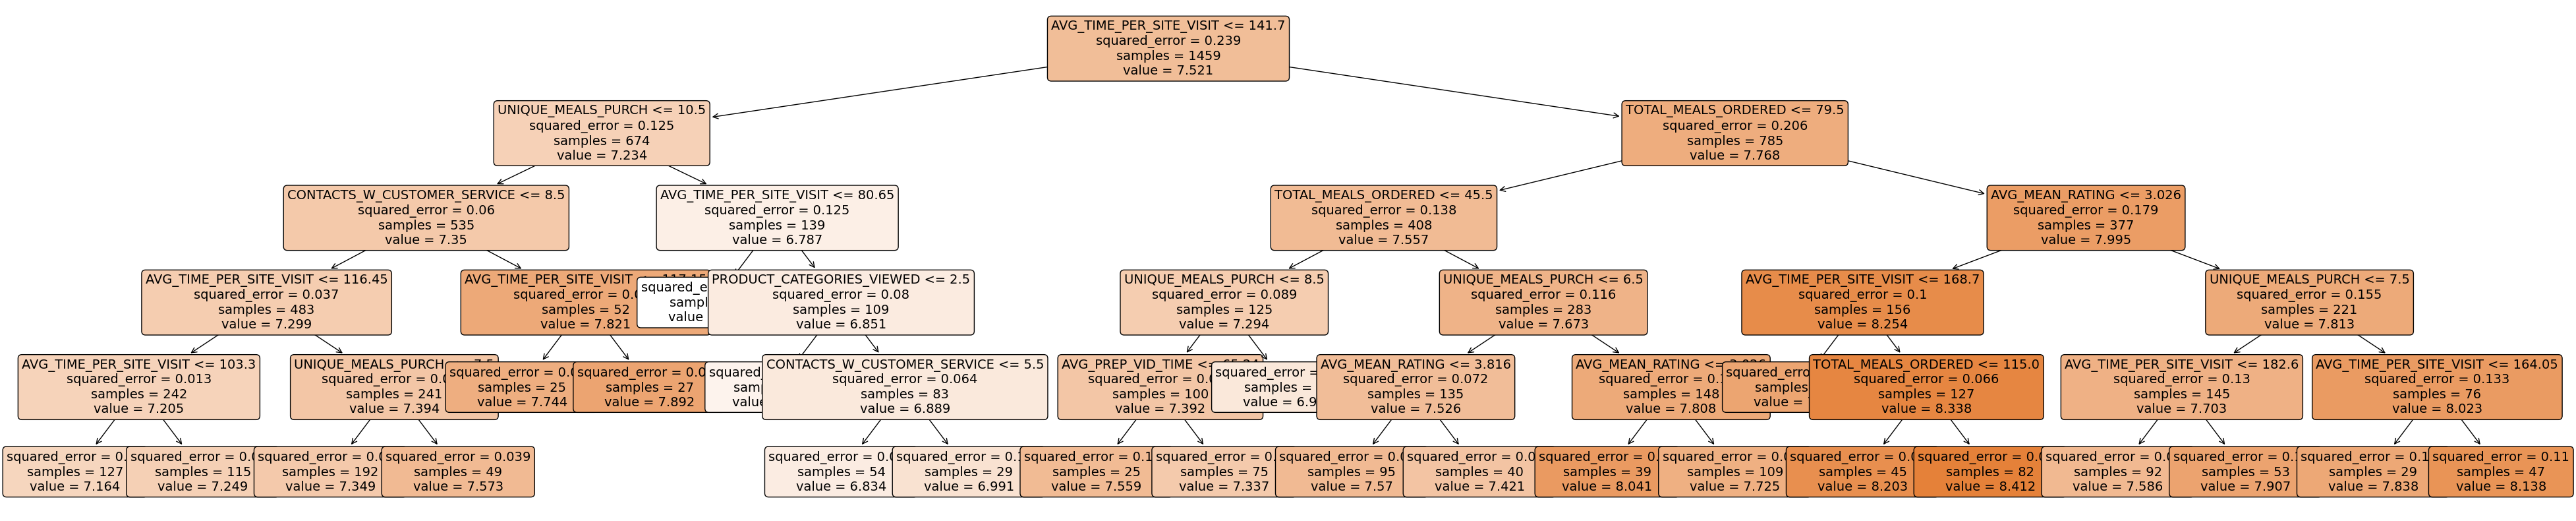

In [29]:
# setting figure size
plt.figure(figsize=(50, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = model, # changing to pruned_tree_fit
          feature_names = x_train.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

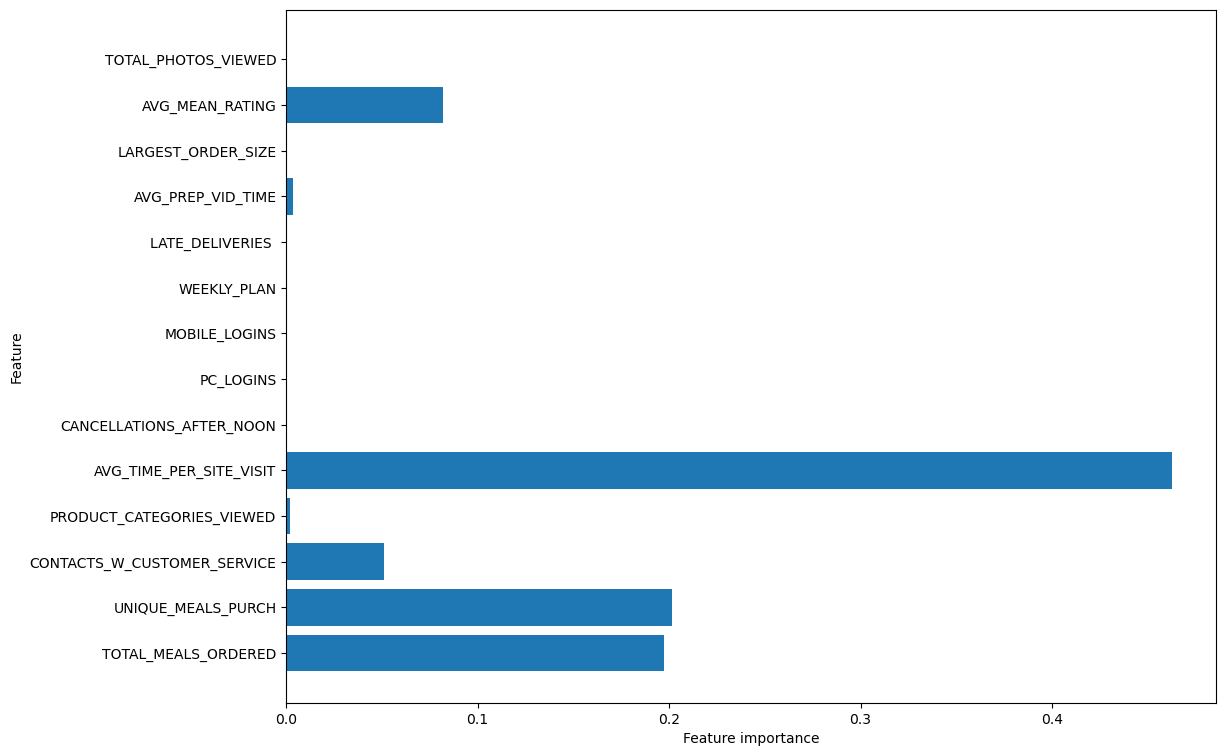

In [30]:
# plotting feature importance
plot_feature_importances(model,
                         train = x_train,
                         export = False)

We need this code to create a random forest model with default parameters that can be trained and tested on the data.

In [31]:
# specifying a model name
############################################################################
model_name = 'Unpruned Random Forest'


# INSTANTIATING a random forest model with default values
model = RandomForestRegressor(n_estimators     = 200,
                              criterion        = "squared_error",
                              max_depth        = 5,
                              min_samples_leaf = 35,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 219)

This code applies the random forest model to the training set of data, applies the model to the testing set to create predictions, and rates the model's performance using the R-squared metric.

To assess the effectiveness of the random forest model and decide whether it is a good fit for our data, we require this code.

In [32]:
# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print(f"""
Model: {model_name}

##############################

Training Score : {model_train_score}
Testing Score  : {model_test_score}
Train-Test Gap : {model_gap}

##############################
""")


Model: Unpruned Random Forest

##############################

Training Score : 0.7634
Testing Score  : 0.7477
Train-Test Gap : 0.0157

##############################



To have a large number of weak decision trees in our model, we employ an unpruned GBM model. The number of trees in an unpruned GBM model is higher, and each tree has a shallower depth.

However, an unpruned GBM model could result in overfitting, particularly if there are a lot of trees.

In [33]:
# specifying a model name
model_name = 'Unpruned GBM'


# INSTANTIATING the model object
model = GradientBoostingRegressor(loss          = 'squared_error',
                                  learning_rate = 0.2,
                                  n_estimators  = 1200,
                                  criterion     = 'friedman_mse',
                                  max_depth     = 5,
                                  warm_start    = False,
                                  random_state  = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)



# displaying results
print(f"""
Model: {model_name}

##############################

Training Score : {model_train_score}
Testing Score  : {model_test_score}
Train-Test Gap : {model_gap}

##############################
""")


Model: Unpruned GBM

##############################

Training Score : 1.0
Testing Score  : 0.7815
Train-Test Gap : 0.2185

##############################



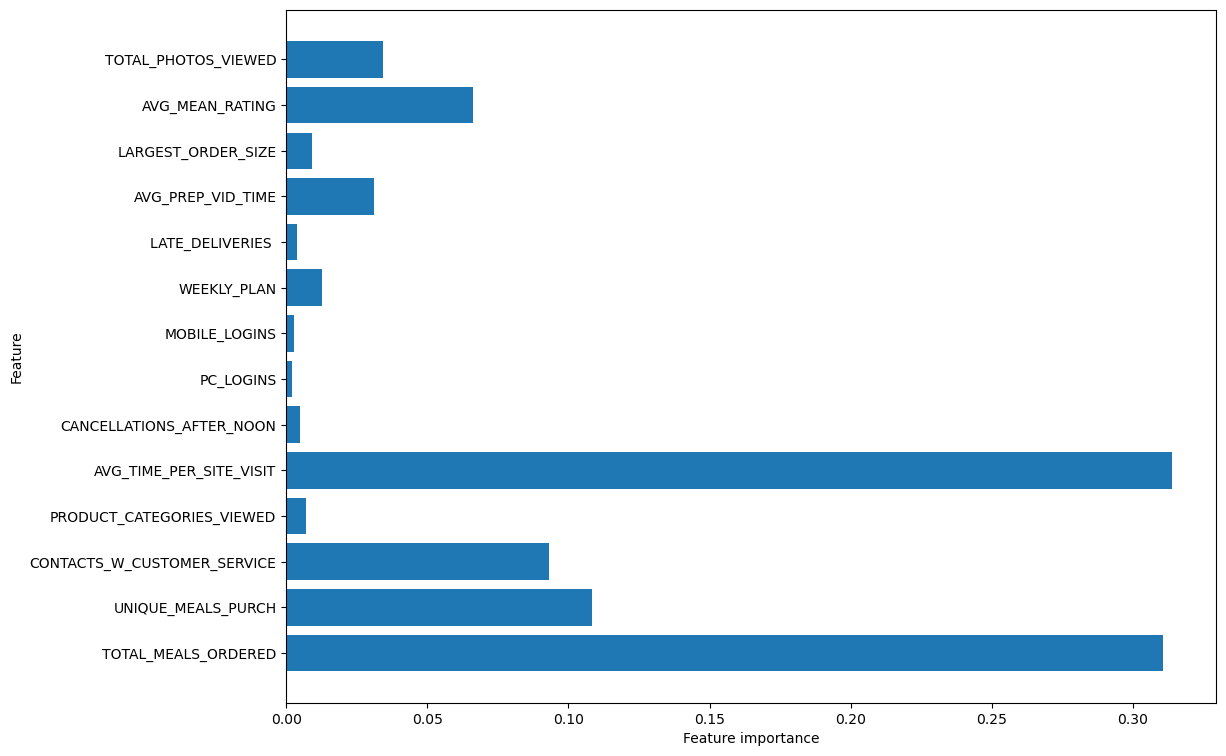

In [34]:
# plotting feature importance
plot_feature_importances(model          ,
                         train = x_train,
                         export = False )

A pruned random forest model is specified and trained using this code. Moreover, the code computes the difference between training and testing scores, scores the data using R-square, and outputs the findings.

For the regression analysis, I determined that the pruned random forest model was the best option. According to the code, the model exhibits strong performance on both the training and testing sets with a relatively small train-test gap. As a result, it is advised to use this model to make forecasts for this project.

In [35]:
# specifying a model name
model_name = 'Pruned Random Forest'


# INSTANTIATING a random forest model with default values
model = RandomForestRegressor(n_estimators     = 200,
                              criterion        = 'mse',
                              max_depth        = 10,
                              min_samples_leaf = 15,
                              bootstrap        = True,
                              warm_start       = True,
                              random_state     = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print(f"""
Model: {model_name}

This is the model that I want to use for my regression analysis.

##############################

Training Score : {model_train_score}
Testing Score  : {model_test_score}
Train-Test Gap : {model_gap}

##############################
""")

/Users/ekaterinakarpova/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(



Model: Pruned Random Forest

This is the model that I want to use for my regression analysis.

##############################

Training Score : 0.8345
Testing Score  : 0.7919
Train-Test Gap : 0.0426

##############################



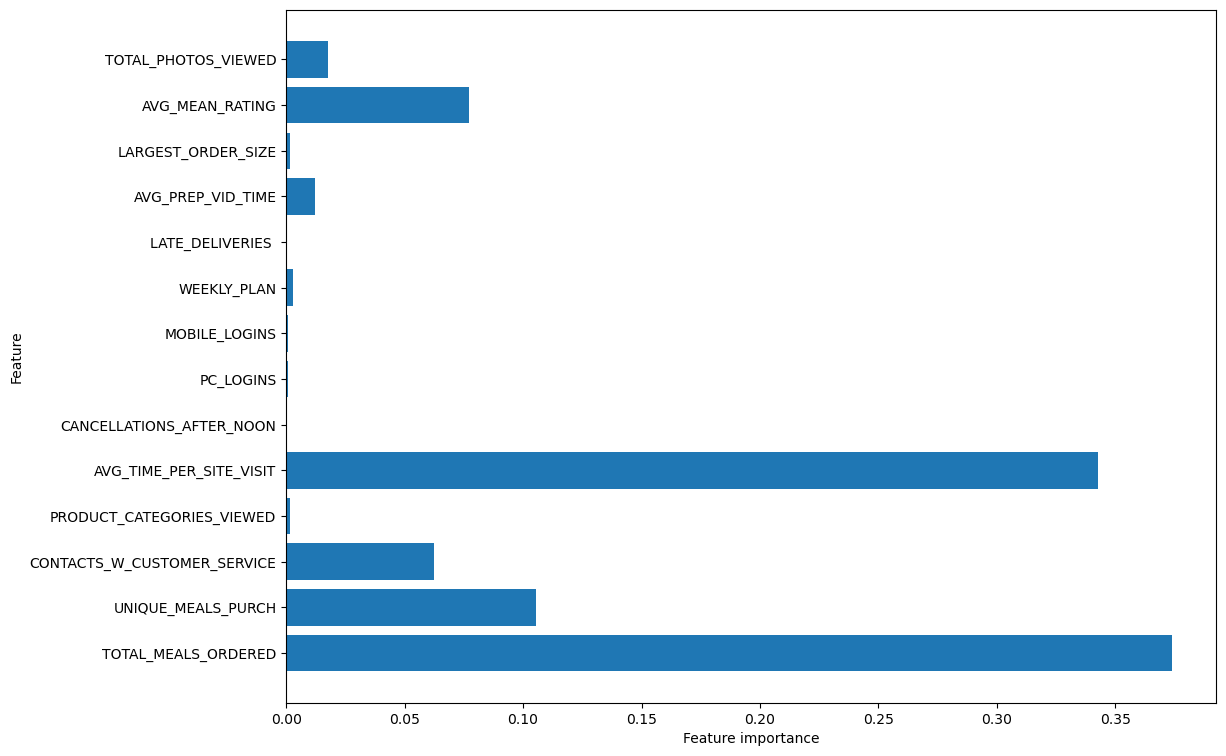

In [36]:
# plotting feature importance
plot_feature_importances(model,
                         train = x_train,
                         export = False)